In [11]:
import os, random, warnings
import cv2
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf

from glob import glob

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import get_custom_objects
import matplotlib.pyplot as plt
from skimage.measure import label # for labeling regions
from skimage.measure import regionprops # for shape analysis
import numpy as np # for matrix operations and array support
from skimage.color import label2rgb # for making overlay plots
import matplotlib.patches as mpatches # for showing rectangles and annotations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread # for reading images
from skimage.feature import greycomatrix, greycoprops
grayco_prop_list = ['contrast', 'homogeneity', 'correlation', 'ASM']
import plotly.express as px
import lib.func as func

In [12]:
def plot_result(df1, features, size = 20, scale = 3):
    dn = len(df1)//6 +1
    ks = list(df1.keys())
    
    for i in range(len(ks)):
        n = df1[ks[i]].argsort()

        display_grid = np.zeros((size, (size+1) * 6-1))+256
        for ind, j in enumerate(n[::dn]):

            display_grid[:, ind * size+ind : (ind+1) * size+ind] = features[j]

        
        plt.figure( figsize=(scale * 6, scale) )
        plt.title ( ks[i] )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto',vmin=1, vmax = 19, cmap='gray' )
        ax = plt.gca()
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()
        plt.clf()

## Texture analysis on single image
1. import example images
2. calculate statistics from 1st and 2nd order texture features
3. visualize results

In [13]:
'''import example images'''
# imgs = np.load('../pre-data/CT_img_tr-200-1000-HU-512.npy', allow_pickle= True).item()
dp = 32
images = np.load('test_imgs.npy', allow_pickle= True).item()
images.keys()

dict_keys(['ID00025637202179541264076'])

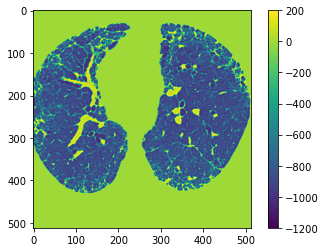

In [14]:
image = images['ID00025637202179541264076'][0]
plt.imshow(image)
plt.colorbar()

In [15]:
df, im = func.get_12order_stat(np.array(image), save_img=True, dp = dp, d= [10], theta=[0])

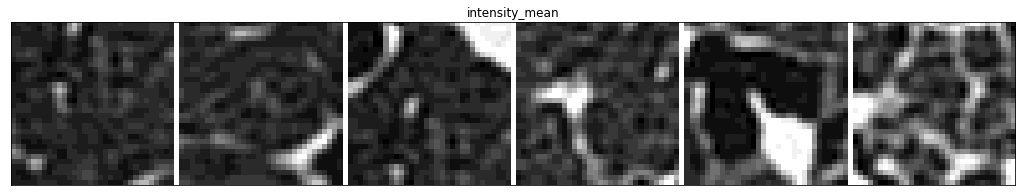

<Figure size 432x288 with 0 Axes>

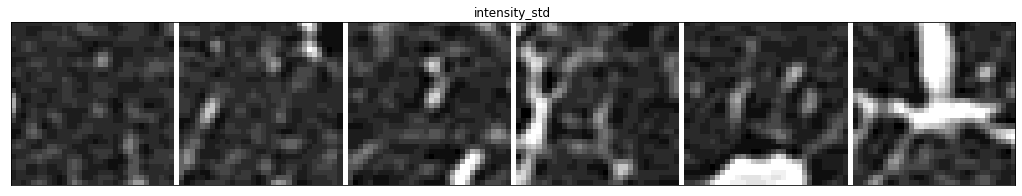

<Figure size 432x288 with 0 Axes>

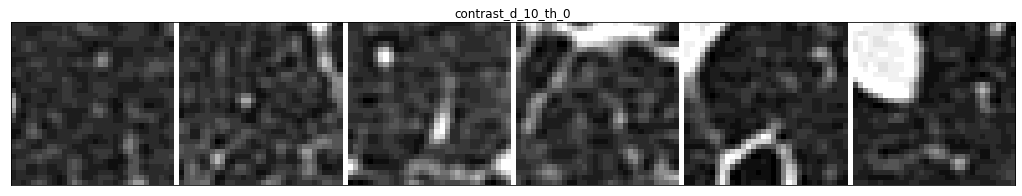

<Figure size 432x288 with 0 Axes>

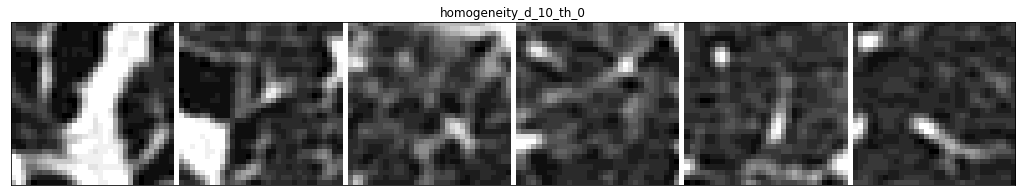

<Figure size 432x288 with 0 Axes>

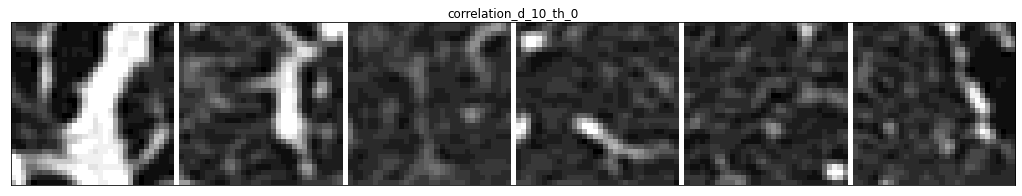

<Figure size 432x288 with 0 Axes>

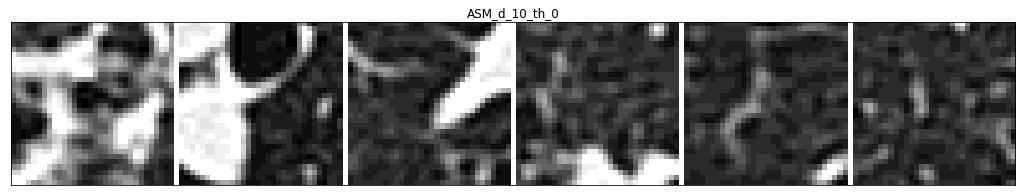

<Figure size 432x288 with 0 Axes>

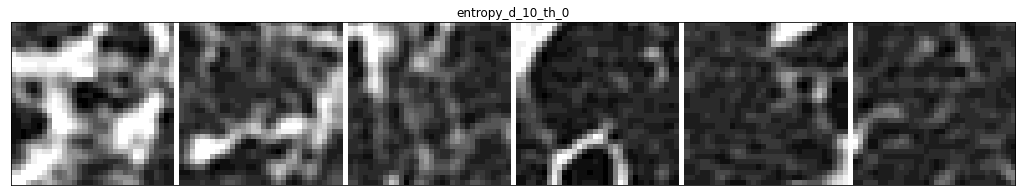

<Figure size 432x288 with 0 Axes>

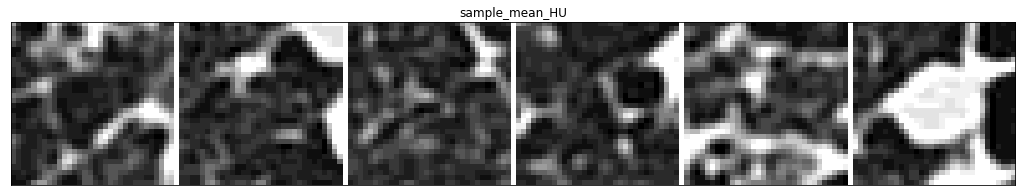

<Figure size 432x288 with 0 Axes>

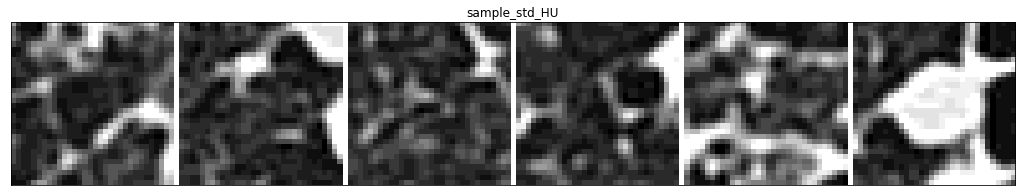

<Figure size 432x288 with 0 Axes>

In [16]:
'''left to right: low to high'''
plot_result(df, im, size = dp, scale = 3)

In [17]:
import matplotlib as mpl
xy_h = [[200,400], [300,400], [300,100], [200,100]]
xy_ill = [[70,120],[100,300], [50,140], [50,300]]
xys = xy_h + xy_ill

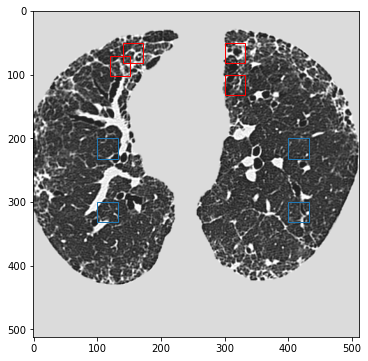

In [18]:
plt.figure(figsize=(15,6))

plt.imshow(image, cmap = 'gray')
ax = plt.gca()
for tup in xys:
    if tup in xy_h:
        ec = 'tab:blue'
    else:
        ec = 'r'
    rect = mpl.patches.Rectangle((tup[1],tup[0]), dp,dp,linewidth=1, edgecolor=ec, facecolor = 'none')
    ax.add_patch(rect)
# ax.set_xticks([])
# ax.set_yticks([])
# plt.colorbar()

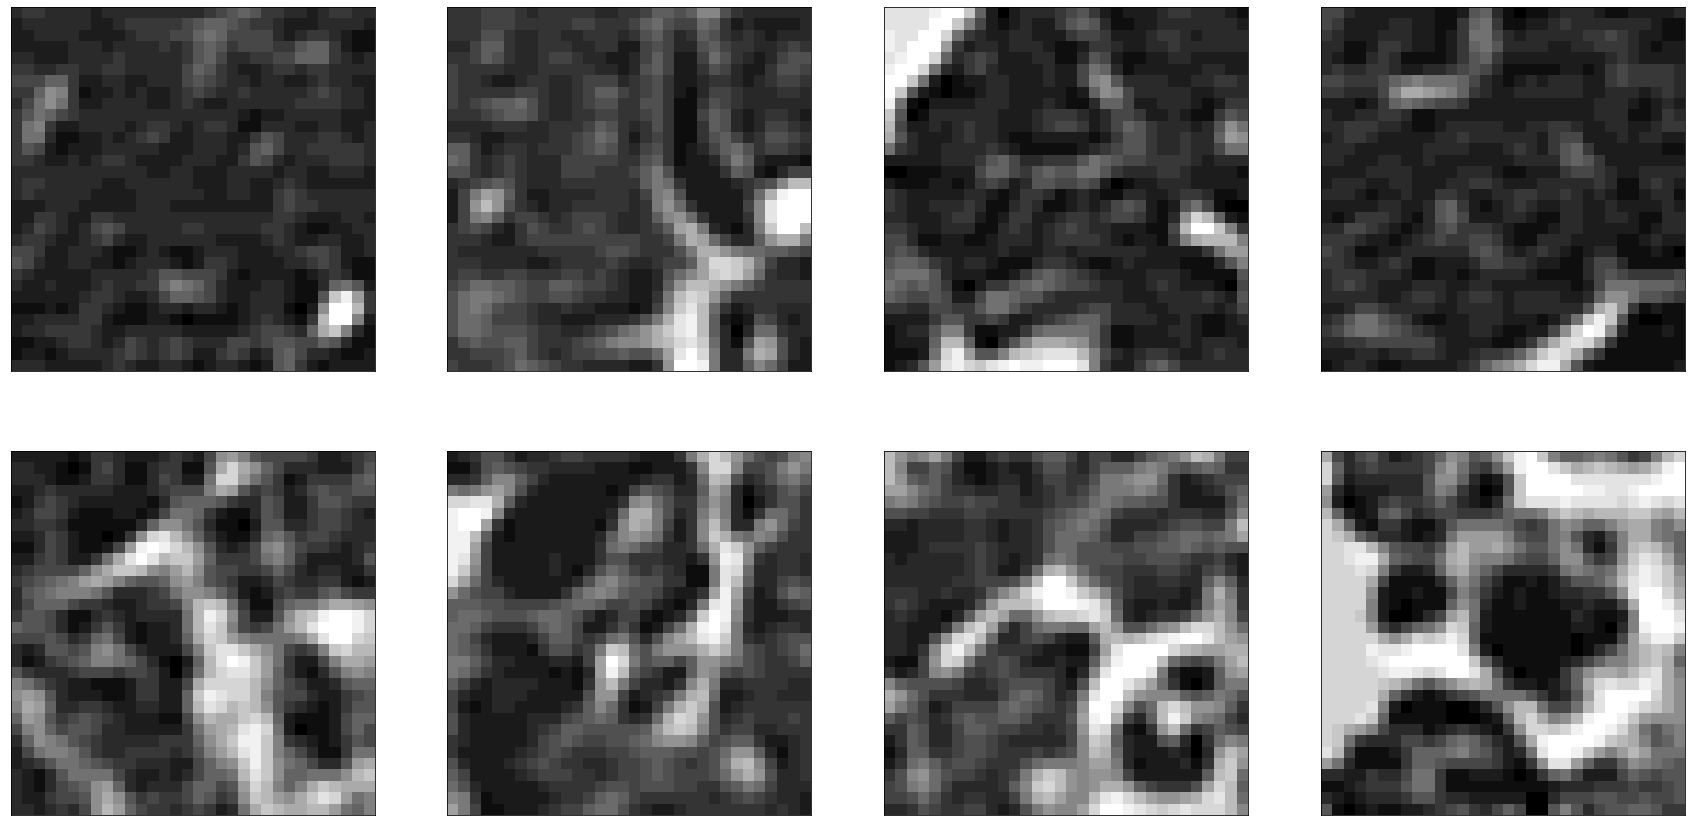

In [23]:
dp= 32
data = []
plt.figure(figsize=(30,15))
for i,tup in enumerate(xys):
    image = np.array((image-np.min(image))/np.max(image)*19, dtype='uint8')
    pos = image[tup[0]:tup[0]+dp, tup[1]:tup[1]+dp]
    plt.subplot(2,4,i+1)
    plt.imshow(pos, cmap='gray')   
    data.append(func.sec_order_stats(pos, theta=[0], d=[10], grey_levels=20))
    
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [24]:
df1 = pd.DataFrame(data)
df1['class'] = ['control','control','control','control','Honeycomb','Honeycomb','Honeycomb','Honeycomb']
fig = px.scatter(df1, x="intensity_mean", y="contrast_d_10_th_0", color="class",
                 size='ASM_d_10_th_0',
                labels={
                     "intensity_mean": "average intensity",
                     "contrast_d_10_th_0": "contrast",
                     
                 },)
fig.show()